<a href="https://colab.research.google.com/github/vedashrith/Data-Science/blob/main/Employee_retension_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Task 1: Logistic Regression on Employee Retention Data

#### Employee Retention:
This dataset contains information about employees who worked in a company.

Target Variable: left

Run this cell by default to load the dataset.

In [ ]:
import pandas as pd

data = pd.read_csv("Employee_Retention.csv")

data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Task1A: 5 points
1. Is there any need to convert columns based on their Dtype? Check details about the data.
2. Check if there are any missing values. Handle the missing values if any.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The .info() method gives the details of the dataset such as columns, their datatypes. based on the context of columns, I think all the columns are in correct Dtype.

In [ ]:
data.isna().sum() #check null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64

By using .isna().sum() method we get the total null values in the dataframe. Based on the output there are no null values.

#Comment your Actions if any

### Task 1B: 5 points
First things first!
Before applying feature engineering or bringing the columns to appropriate form, split the data into training/testing.
Why? because by doing this we ensure that there is no data leakage.

1. Split the data into training/testing with 80-20 ratio.
2. Use stratify since to ensure equal percentage of class samples into both subsamples.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('left', axis = 1) #drops the target
y = data['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40) #splitting the data



The train_test_split is a part of sklearn library, which is used to split the data into training and test sets (X,y). The test_size is set to 0.2 which gives a 80 - 20 split ratio.The random state ensures we get same training and test set everytime we run the code.

### Task 1C: 10 points
Define a class 'convert_cat' which will-

1. Map the ordinal categorical values.
2. Is it fleasible to create dummy variables from 'sales' categircal variable? My suggestion use frequency encoding.

Note: be very careful to handle each column while converting them.

In [ ]:
class convert_cat:
  def __init__(self, data):
    self.data = data

#function for ordinal categorical values
  def ordinal(self):
    map_sal = {'low' : 1,
               'medium' : 2,
               'high' : 3
           }
    self.data['salary'] = self.data['salary'].map(map_sal)

#function for frequency encoding
  def freq(self, col):
    en = self.data[col].value_counts(normalize = True)
    self.data[col] = self.data[col].map(en)

#function for transforming
  def transform(self):
    self.ordinal()
    self.freq('sales')


The class covert_cat is defined as specified. The map_sal variable is used to map the ordinal categorical variables. The salary column is the ordinal categorical variable. The freq method is used to apply frequency encoding to sales. The transform method applies all transormations.

Now simply callthe function for training and testing data. Remember to store the column names into a variable. You will require it later.

IMP NOTE: reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set

In [ ]:
#transforming the data

X_train_conv = convert_cat(X_train)
X_train_conv.transform()
col = X_train_conv.data.columns

X_test_conv = convert_cat(X_test)
X_test_conv.transform()

X_test_conv.data = X_test_conv.data.reindex(columns = col, fill_value = 0)

X_train_transformed = X_train_conv.data
X_test_transformed = X_test_conv.data




### Task 1D: 5 points
Scale training and testing data using StandardScaler method.

Tip: only transform the testing data.

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaling data using Standard scaler
scaler = StandardScaler()
scaler.fit(X_train_transformed)
X_train_scaled = scaler.transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

We scale the data using StandardScaler method which is a part of sklearn library. The fit method gets mean and standard deviation for each feature in the training set. The transform method aplying the scaling on both the sets.

### Task 1E: 10 points

Finally!
1. Define Logistic Regression.
2. Use class_weight with 'balanced' to penalize the False positives more as the the class is imbalanced.
3. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
4. Print the mean of roc_auc scores.
5. Fit the training data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

#model and validator
model = LogisticRegression(class_weight='balanced', random_state=40)
val = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3, random_state = 40)

score = cross_val_score(model, X_train_scaled, y_train, scoring = 'roc_auc', cv = val)
print("Mean roc_auc score:",np.mean(score))


Mean roc_auc score: 0.825192112993148


Logistic Reression is used to initialize the logistic regression model while considering the imbalance among classes. The RepeatedStratifiedKFold is initialized with 5 splits, 3 repeats and roc_auc as scoring.

In [ ]:
model.fit(X_train_scaled, y_train) #fitting the model

LogisticRegression(class_weight='balanced', random_state=40)

We fit the model using the training set.

### Task 1F: 5 points

1. Predict class for testing data.
2. Create another dataframe which contains actual y values and y test probability values from model.

Note: y test probablity values are for the event(ie 1, left)

In [ ]:
y_test_pred_lr = model.predict(X_test_scaled)                 #predict class
y_test_prob_pred = model.predict_proba(X_test_scaled)[:,1]    #predict probability values
df = pd.DataFrame({
    'Actual y values': y_test,
    'Probability values': y_test_prob_pred
})

The class is predicted for testing data.
Predict_proba is used to get probability estimates for each class. A new dataframe is created for storing y values and y test probability values.

In [ ]:
df.head() # display the rows of the result set.

,Actual y values,Probability values
10902,0,0.192353
225,1,0.518722
5459,0,0.450793
6949,0,0.075408
7276,0,0.557162


### Task 1G: 10 points
1. Define a threshold of 0.5 and add column y test prediction based on the probabilities predicted for the thresholds.
2. Print the confusion matrix
3. Plot ROC_AUC curve
4. Print the AUC_ROC score for actual and predict probability y.

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

#threshold
thresh = 0.5
y_test_pred = (y_test_prob_pred >= thresh).astype(int)
df['Y_test_predction'] = y_test_pred

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_pred)
roc_auc = auc(fpr, tpr)


Confusion Matrix:
[[1730  556]
 [ 152  562]]


A threshold of 0.5 is set up in the code. The y_test_pred column is created based on the probabilities of the y_test using the threshold. Next the confusion matrix is generated.

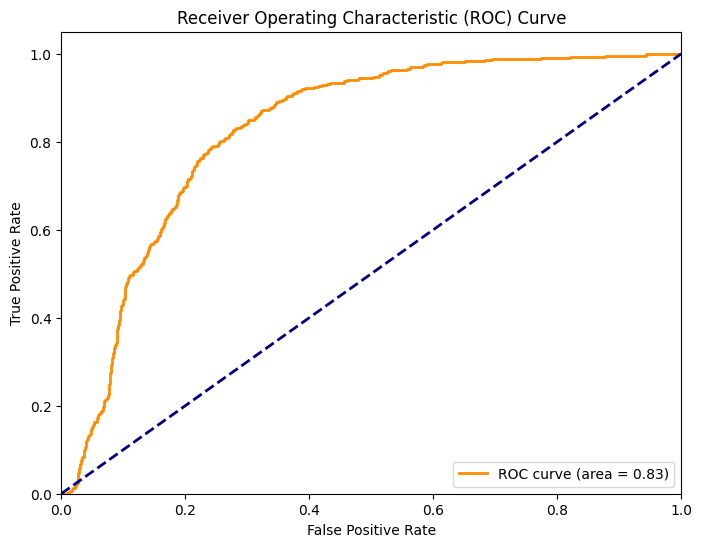

In [ ]:
import matplotlib.pyplot as plt

#plot for ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The plot for roc curve is generated using matplotlib which is a visualization library in python. The plot is between the True postitve rate and false positive rate of model.

In [ ]:
print("AUC-ROC Score:", roc_auc_score(y_test, y_test_prob_pred)) #score

AUC-ROC Score: 0.8268182163504072


The AUC_ROC score is calculated using the roc_auc_score method which is a part sklearn.metrics library.



### Task 1H: 10 points

Let's try for another model.
1. Define Random Forest. Don't yet fit the model.
2. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
3. Print the mean of roc_auc scores.
4. Fit the training data.
5. Predict class for testing data.
6. predict y test probability values from model.
7. Print the AUC_ROC score for actual and predict probability y.

Note: y test probablity values are for the event(ie 1, left)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=40)          #model
score_rf = cross_val_score(model_rf, X_train_scaled, y_train, scoring = 'roc_auc', cv = val)
print("mean ROC_AUC Score:", np.mean(score_rf))

model_rf.fit(X_train_scaled, y_train)


mean ROC_AUC Score: 0.9923475543813046


RandomForestClassifier(random_state=40)

RandomforestClassifier is initialized. We use the same repeated stratified k fold configuration as in the previous section. The mean ROC_AUC score is printed. Next the model is fit on the training set.

In [ ]:
y_test_pred_rf = model_rf.predict(X_test_scaled)   #predict class
y_test_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]      #predict probability

The class is predicted for testing data along with y_test probability values.

In [ ]:
print("AUC-ROC Score:", roc_auc_score(y_test_pred_rf, y_test_prob_rf))  #score

AUC-ROC Score: 1.0


The AUC_ROC score is calculated using the roc_auc_score method which is a part sklearn.metrics library.

In Task we have worked on the employee retension dataset. There are no missing values and the columns datatypes are in their appropriate format. We have implemented covertcat class. The dataset was split using train_test_split in 80-20 ratio. we have implemented the classification algorithms: Logistic regression and Random forest on this dataset.

###Logistic Regression:
The mean ROC score of 82.5% indicates that the model has a good ability to distinguish between employees who left and who stayed.
In the confusion matrix, The number of false positives is relatively high, which may suggest that the model is more sensitive to predicting 'left' when it shouldn't.
The curve indicates that the model has high positive rate and low false positive rate which indicates that the model performs well.

###Random Forest:
The high mean roc score of 99.2% indicates exccellent performance.
The AUC - roc score of 1 is ideal which means the model is accurately classifying the data. though it is perfect, there is a possibility of overfitting.

## Task 2: NLP on  Email Data

Next up! This task involves applying NLP techniques on the data which consists of text from the news and their classification whether they are Fake news or Real News.

Simply run below cell to read and display the data

In [ ]:
import pandas as pd
news_data = pd.read_csv("fake_or_real_news.csv")

news_data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Task 2A: 5 points

1. Map the 'label' variable to 1-Fake and 0-Real.
2. Display a pie chart for the distribution of two categories of news.
3. The pie chart should have title, the name and percentage of each category and startangle equal to 90.
4. Use explode feature for Fake category.

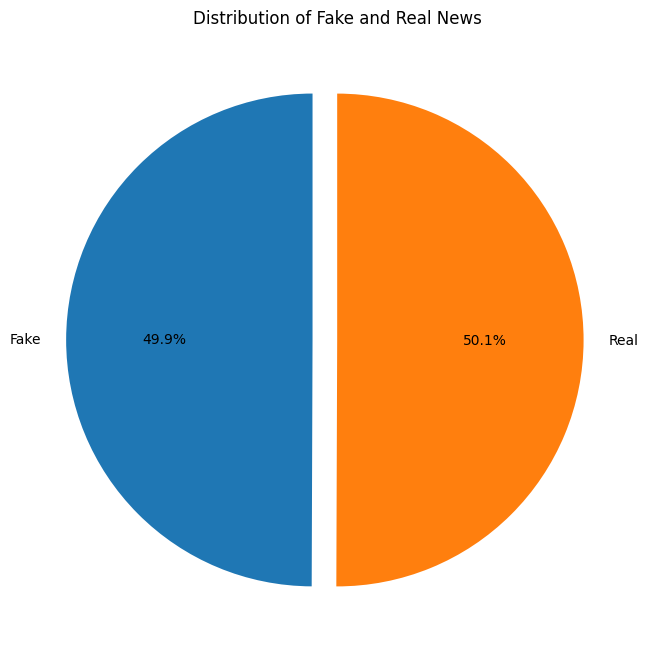

In [ ]:
import matplotlib.pyplot as plt

news_data['label_num'] = news_data['label'].map({'FAKE': 1, 'REAL': 0})   #mapping
cat_ct = news_data['label_num'].value_counts()
label = ['Fake', 'Real']
sizes = [cat_ct[1], cat_ct[0]]
explode = (0.1, 0)

#pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=label, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fake and Real News')
plt.show()


The label is mapped 1 and 0 on the new column label_num. pie chart is plotted using plt.pie which is a part of matplotlib library.

### Task 2B: 10 points
Now its time to clean the text to keep as many as useful words for further processing.

1. Remove special caharacters from the text.
2. Remove stop words.
3. Lemmatize the words.
4. Keep only text that is alphabet and the length of the word is greater than 2.

Note: Remember to lower the text before applying these cleaning techniques.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#making suring they are present(they are updated most of the time)
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stopwds = set(stopwords.words('english'))

def clean(txt):
  txt = txt.lower()            #case change
  txt = re.sub('[^a-zA-Z]',' ', txt)       #Regular expression usage
  words = txt.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stopwds and len(word) > 2]
  txt = ' '.join(words)
  return txt

news_data['cleaned_txt'] = news_data['text'].apply(clean)
news_data[['text', 'cleaned_txt']].head() #print few rows in the cleaned text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,cleaned_txt
0,"Daniel Greenfield, a Shillman Journalism Fello...",daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,secretary state john kerry said monday stop pa...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",kaydee king kaydeeking november lesson tonight...
4,It's primary day in New York and front-runners...,primary day new york front runner hillary clin...


We use nltk library to clean the text while keeping the useful words. Download stopwords and wordnet package. set up the lemmatizer and wordnet. Next we create function called clean which accepts txt variable. we clean the text using lemmatizer based on stopwords.

### Task 2C: 5 points

1. Split the data into training/testing with 80-20 ration and stratify
2. Also define startified kfold with 3 splits.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
X = news_data['cleaned_txt']
y = news_data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)  #split for train and test data


The train_test_split is used to split the data in to training and test sets in the 80-20 ratio. Stratified K fold is used with 3 splits.

### Task 2D: 5 points

1. Use Bag of words technique with bigrams and apply to trainign and testing data.
2. Use TF-IDF technique with bigrams and apply to training and testing data.

TIP: Remember to store the modified data into different variables.
Note: Remember to only transform the testing data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#bag of words technique
vect = CountVectorizer(ngram_range = (1,2), stop_words='english')
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)

CountVectorizer is part of sklearn.feature_extraction.text library which is for Bag of words technique. We have applied this on both training and test set.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TF-IDF
vect_tf = TfidfVectorizer(ngram_range = (1,2), stop_words='english')
X_train_vect_tf = vect_tf.fit_transform(X_train)
X_test_vect_tf = vect_tf.transform(X_test)

Similarly, TfidfVectorizer is used for TF-IDF technique.

### Task 2E: 10 points
Now comes the main part where we will be applying machine learning algorithms on the cleaned, transformed data.

1. Apply Multinomial Naive Bayes and Logistic Regression for both bag of words and TF-IDF transformed data.
2. Use Accuracy and F1 evaluation metric
3. Display the scores in a tabular format.
4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further and print the accuracy score.
5. Display the confusion matrix.

Note: Look at the F1 score while selecting the bag of words and TFIDF technique for each algorithm.

Multinomial Naive Bayes with Bag of Words - Accuracy: 0.8950, F1 score:0.8944278095977227


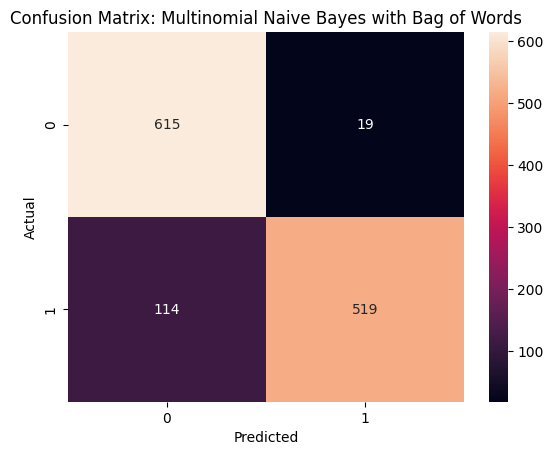

Multinomial Naive Bayes with TF-IDF - Accuracy: 0.8240, F1 score:0.8189479335266208


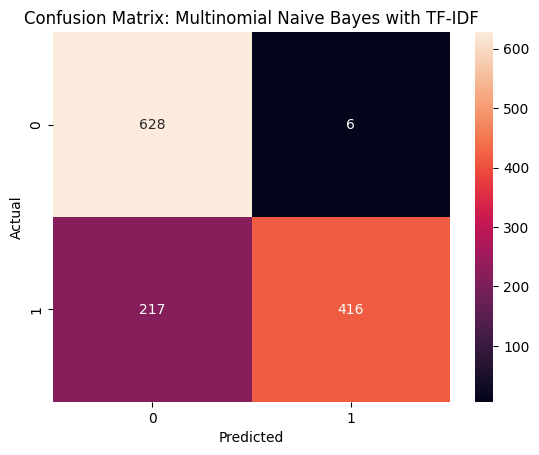

Logistic Regression with Bag of Words - Accuracy: 0.9187, F1 score:0.9185762662959315


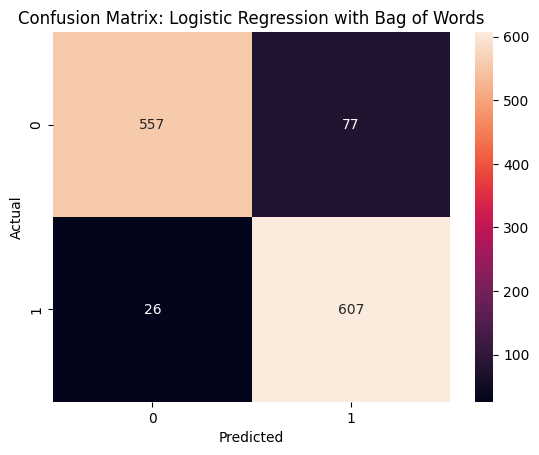

Logistic Regression with TF-IDF - Accuracy: 0.9124, F1 score:0.9123638526876913


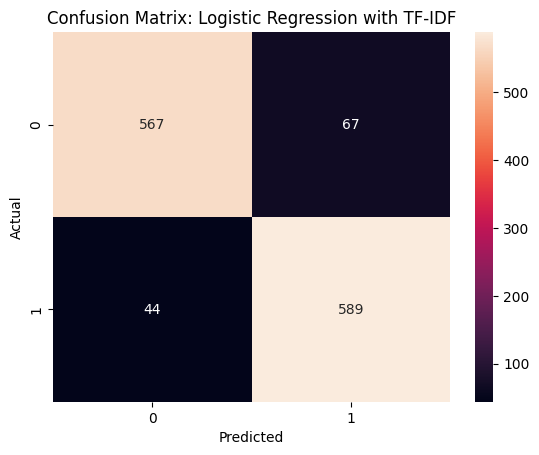

In [ ]:
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

#model initialization
model_nb = MultinomialNB()
model_lr = LogisticRegression(solver = 'liblinear')

def train_eval(model, X_train, X_test, y_train, y_test, model_name, dtyp):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  res = {
      'Model': model_name,
      'Data Type': dtyp,
      'Accuracy': acc,
      'F1 Score': f1
  }
  print(f"{name} with {dtype} - Accuracy: {acc:.4f}, F1 score:{f1}")
  cm = confusion_matrix(y_test, y_pred)                               #confusion matrix
  #plot Confusion matrix
  sns.heatmap(cm, annot=True, fmt='d')
  plt.title(f'Confusion Matrix: {name} with {dtype}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  return res

scores = []
models = [
    (model_nb, 'Multinomial Naive Bayes'),
    (model_lr, 'Logistic Regression')
]

data_tr = [
    (X_train_vect, X_test_vect, 'Bag of Words'),
    (X_train_vect_tf, X_test_vect_tf, 'TF-IDF')
]

for model, name in models:
  for train,test,dtype in data_tr:
    i = train_eval(model, train, test, y_train, y_test, name, dtype)
    scores.append(i)

df_res = pd.DataFrame(scores)


We have intialized the Logistic Regresssion and Multinomial NAive bayes models. A traineval method is developed to train the models using the transformed data. Accuracy and F1 scores are calculated. Confusion matrices are created using sns which is short for seaborn package.

In [ ]:
df_res.head() # print the content

,Model,Data Type,Accuracy,F1 Score
0,Multinomial Naive Bayes,Bag of Words,0.895028,0.894428
1,Multinomial Naive Bayes,TF-IDF,0.823994,0.818948
2,Logistic Regression,Bag of Words,0.918706,0.918576
3,Logistic Regression,TF-IDF,0.912391,0.912364


In [ ]:
from sklearn.model_selection import GridSearchCV

#parameter setup
pnb = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
plr = {'C': [0.01, 0.1, 1.0, 10.0, 100.0]}

#tuned model init
modelsHT = [
    (model_nb, pnb, 'MultinomialNB (Tuned)'),
    (model_lr, plr, 'LogisticRegression (Tuned)')
]

dataHT = [
    (X_train_vect, 'Bag of Words'),
    (X_train_vect_tf, 'TF-IDF')
]

best_models ={}

for model, par, name in modelsHT:
  for data, dtype in dataHT:
    grid = GridSearchCV(model, par, cv=3, scoring='accuracy')    #GridsearchCV usage
    grid.fit(data, y_train)                                     #upto 20 minutes to execute
    best_models[(name, dtype)] = grid.best_estimator_



In this cell we have hypertuning the model parameters and fitting the model using GridSearchCV. Best model is decided using best_estimator_

MultinomialNB (Tuned) with Bag of Words - Accuracy: 0.9061, F1 score:0.9058


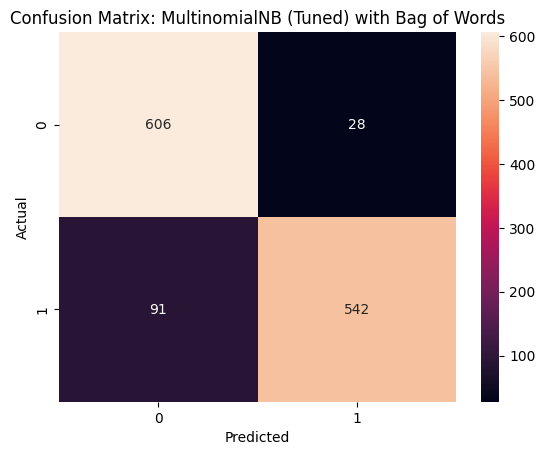

MultinomialNB (Tuned) with TF-IDF - Accuracy: 0.9187, F1 score:0.9186


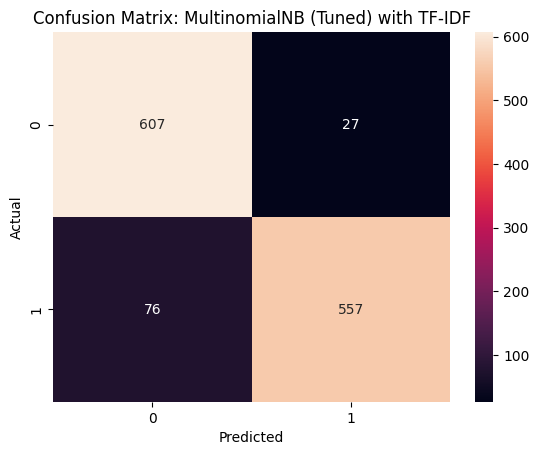

LogisticRegression (Tuned) with Bag of Words - Accuracy: 0.5083, F1 score:0.3519


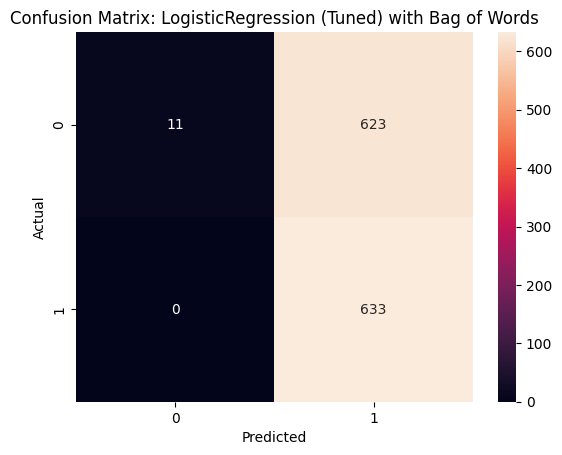

LogisticRegression (Tuned) with TF-IDF - Accuracy: 0.9282, F1 score:0.9282


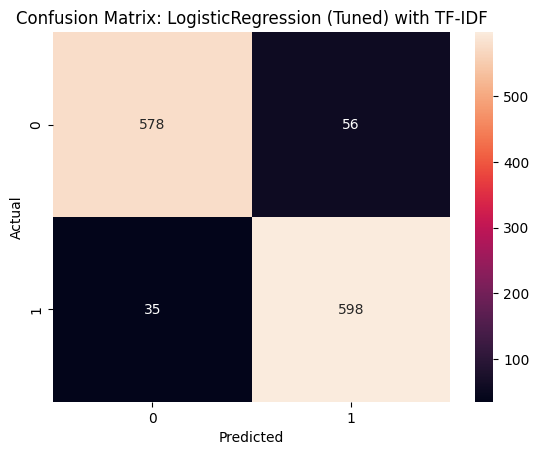

In [ ]:
#scores and Confusion matrix
for (name, dtype),model in best_models.items():
  if name == 'Bag of Words':
    X_test_ht = X_test_vect
  else:
    X_test_ht = X_test_vect_tf

  y_pred = model.predict(X_test_ht)
  acc = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  res = {
      'Model': name,
      'Data Type': dtype,
      'Accuracy': acc,
      'F1 Score': f1
  }
  print(f"{name} with {dtype} - Accuracy: {acc:.4f}, F1 score:{f1:.4f}")
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d')
  plt.title(f'Confusion Matrix: {name} with {dtype}')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()
  scores.append(res)

df_res_final = pd.DataFrame(scores)


In this we have calculated the Accuracy and F1 score. We have displayed the confusion matrices for each model using seaborn.

In [ ]:
df_res_final # print all the score in tabular format.

,Model,Data Type,Accuracy,F1 Score
0,Multinomial Naive Bayes,Bag of Words,0.895028,0.894428
1,Multinomial Naive Bayes,TF-IDF,0.823994,0.818948
2,Logistic Regression,Bag of Words,0.918706,0.918576
3,Logistic Regression,TF-IDF,0.912391,0.912364
4,MultinomialNB (Tuned),Bag of Words,0.906077,0.905841
5,MultinomialNB (Tuned),TF-IDF,0.918706,0.918581
6,LogisticRegression (Tuned),Bag of Words,0.508287,0.351901
7,LogisticRegression (Tuned),TF-IDF,0.928177,0.928158


### Task 2F: 5 points
1. Display a bar chart for the accuracy scores for each model.
2. Display the percentages on the bar.
3. Apply opacity on the bars according to the scores(1 being highest).
4. Display proper title and axes names.
5. IMP: Interpret your results and conclusion.

Note: Adjust ylims to clearly see the difference.

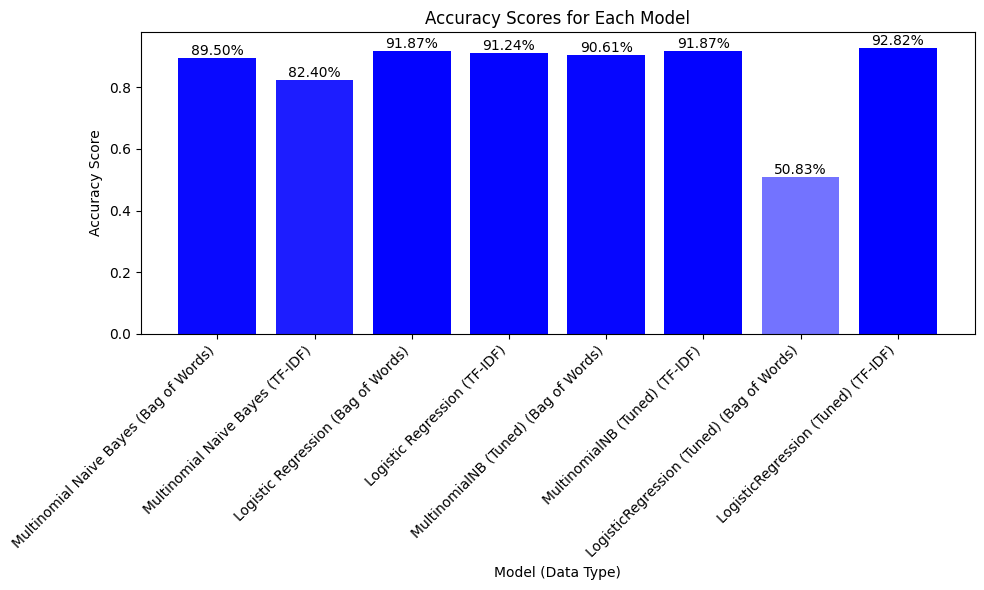

In [ ]:
import matplotlib.pyplot as plt

models = df_res_final['Model'] + ' (' + df_res_final['Data Type'] + ')'
accuracy_scores = df_res_final['Accuracy']

#Normalize opacity based on accuracy
opacity = accuracy_scores / accuracy_scores.max()

#plot bar graphs
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color='blue')

for bar, alpha in zip(bars, opacity):
    bar.set_alpha(alpha)

#percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{height:.2%}', ha='center', va='bottom')

plt.title('Accuracy Scores for Each Model')
plt.xlabel('Model (Data Type)')
plt.ylabel('Accuracy Score')

#label rotation
plt.xticks(rotation=45, ha='right')

plt.ylim(0, max(accuracy_scores) + 0.05)  # Add some space above the highest bar

plt.tight_layout()
plt.show()


In this cell, we are using matplotlib to plot the bar graph of all models before and after hyperparameter tuning. Normalized the opacity using accuracy. Finally we have visualized the scores in the bar graph form using matlplotlib. The hyperparameter tuning helped the models to improve their accuracy scores except for logistic regression for Bag of words technique.